<a href="https://colab.research.google.com/github/Kavs6/sentimental/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/IMDB Dataset.csv.zip')
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
text=" "
stopwords=set(STOPWORDS)
stopwords.add('br')
for rev in df.review:
  rev=str(rev)
  array=rev.split()
  for i in range(len(array)):
    array[i]=array[i].lower()

  text += " " .join(array) + " "

In [ ]:
print(len(text))

65520473


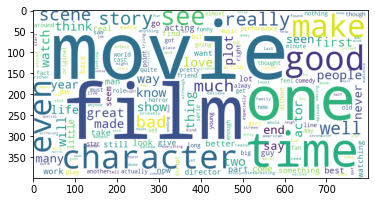

In [ ]:
import matplotlib.pyplot as plt
wordcloud=WordCloud(stopwords=stopwords,scale=2,collocations=False,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.show()

In [ ]:
x=df['review'].values
y=df['sentiment'].values

In [ ]:
print(x)

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [ ]:
print(y)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=500)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
text_model=Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y_pred=text_model.predict(x_test)
print(y_pred)

['negative' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
print(y_test)

['positive' 'negative' 'negative' ... 'positive' 'positive' 'negative']


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(accuracy_score(y_pred,y_test)*100)

86.78399999999999


In [ ]:
print(confusion_matrix(y_pred,y_test))

[[5555  957]
 [ 695 5293]]


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.89      0.85      0.87      6512
    positive       0.85      0.88      0.87      5988

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



In [ ]:
print(stopwords)

{'our', 'an', 'their', 'before', 'between', 'why', 'own', "what's", "they'll", 'from', 'any', 'has', 'it', "weren't", 'not', 'yourselves', 'br', 'his', 'while', 'i', 'com', 'could', 'http', 'only', "where's", "she'd", 'both', 'very', 'cannot', "you'd", 'those', "how's", "aren't", 'shall', "we're", 'under', "here's", 'some', 'out', 'the', 'am', "he's", 'more', "i'll", 'for', "you're", 'had', 'with', 'is', 'ourselves', 'herself', 'we', 'same', "we've", "isn't", 'have', 'hers', 'no', 'then', 'again', 'during', "can't", 'too', 'each', 'he', 'me', 'up', 'above', 'can', 'below', "wasn't", 'on', 'most', "hasn't", 'if', "there's", 'get', "wouldn't", 'by', 'when', "didn't", 'just', 'however', 'they', 'does', 'there', "i'd", 'off', 'was', 'through', 'www', "shouldn't", "he'd", 'as', 'few', 'whom', 'been', 'because', "we'll", 'were', 'this', 'yours', 'ever', 'being', 'did', 'ought', 'than', 'but', 'otherwise', 'you', "won't", 'themselves', 'them', 'since', 'these', 'him', 'to', 'in', 'such', 'tha

In [ ]:
x[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
y[0]

'positive'

In [ ]:
x[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
y[3]

'negative'

In [ ]:
x[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
y[7]

'negative'

In [ ]:
x[7]

"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air."

In [ ]:
(df['sentiment']=='negative') 

0        False
1        False
2        False
3         True
4        False
         ...  
49995    False
49996     True
49997     True
49998     True
49999     True
Name: sentiment, Length: 50000, dtype: bool

In [ ]:
x[2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'